<a href="https://colab.research.google.com/github/yukomath/Project_1/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0. Preparation for google colab (Only once)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. Data preparation


In [ ]:
# import library
import pandas as pd
import numpy as np

# loading csv file from my google drive
path = '/content/drive/MyDrive/ColabProjects/StackOverflow2025/survey_results_public_2025.csv'
df = pd.read_csv(path, encoding='utf-8-sig')

# Check Data
print("Data loaded successfully")
print("Rows, Columns:", df.shape)
print("First few column names:", df.columns[:10].tolist())



Data loaded successfully
Rows, Columns: (49123, 170)
First few column names: ['ResponseId', 'MainBranch', 'Age', 'EdLevel', 'Employment', 'EmploymentAddl', 'WorkExp', 'LearnCodeChoose', 'LearnCode', 'LearnCodeAI']


In [ ]:
# check what columns in the data
print(df.columns.tolist())



['ResponseId', 'MainBranch', 'Age', 'EdLevel', 'Employment', 'EmploymentAddl', 'WorkExp', 'LearnCodeChoose', 'LearnCode', 'LearnCodeAI', 'AILearnHow', 'YearsCode', 'DevType', 'OrgSize', 'ICorPM', 'RemoteWork', 'PurchaseInfluence', 'TechEndorseIntro', 'TechEndorse_1', 'TechEndorse_2', 'TechEndorse_3', 'TechEndorse_4', 'TechEndorse_5', 'TechEndorse_6', 'TechEndorse_7', 'TechEndorse_8', 'TechEndorse_9', 'TechEndorse_13', 'TechEndorse_13_TEXT', 'TechOppose_1', 'TechOppose_2', 'TechOppose_3', 'TechOppose_5', 'TechOppose_7', 'TechOppose_9', 'TechOppose_11', 'TechOppose_13', 'TechOppose_16', 'TechOppose_15', 'TechOppose_15_TEXT', 'Industry', 'JobSatPoints_1', 'JobSatPoints_4', 'JobSatPoints_5', 'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9', 'JobSatPoints_10', 'JobSatPoints_11', 'JobSatPoints_13', 'JobSatPoints_14', 'JobSatPoints_15', 'JobSatPoints_16', 'JobSatPoints_15_TEXT', 'AIThreat', 'NewRole', 'ToolCountWork', 'ToolCountPersonal', 'Country', 'Currency', 'CompTota

In [ ]:
# Select relevant columns in the data

cols = [
    "Country",
    "Age",
    "EdLevel",
    "YearsCode",              # coding experience years
    "Employment",
    "LanguageHaveWorkedWith", # languages used
    "AISelect",               # AI tools usage indicator
    "ConvertedCompYearly"     # salary (target)
]
df = df[cols].copy()

In [ ]:
# handle missing values
df["ConvertedCompYearly"] = pd.to_numeric(df["ConvertedCompYearly"], errors='coerce')
df = df[df["ConvertedCompYearly"].notnull()]  # drop rows without salary

# we put medium dor missing YearsCode
df["YearsCode"] = pd.to_numeric(df["YearsCode"], errors='coerce')
df["YearsCode"] = df["YearsCode"].fillna(df["YearsCode"].median())
df["EdLevel"] = df["EdLevel"].fillna("Unknown")
df["Country"] = df["Country"].fillna("Unknown")
df["Employment"] = df["Employment"].fillna("Other")
df["AISelect"] = df["AISelect"].fillna("No Answer")

In [ ]:
# Remove salary outliers
df = df[df["ConvertedCompYearly"].between(5000, 500000)]


In [ ]:
# One-hot encode the multi-valued language column
df["LanguageHaveWorkedWith"] = df["LanguageHaveWorkedWith"].fillna("")
languages = df["LanguageHaveWorkedWith"].str.get_dummies(sep=';')


In [ ]:
# One-hot encode categorical columns
cat_cols = ["Country", "EdLevel", "Employment", "AISelect"]
df_encoded = pd.get_dummies(df[cat_cols], drop_first=True)


In [ ]:
# Combine all features
X = pd.concat([
    df[["YearsCode"]],
    languages,
    df_encoded
], axis=1)

y = df["ConvertedCompYearly"]

print("Feature engineering completed successfully")
print("Number of features:", X.shape[1])
print("Number of target samples:", y.shape[0])

Feature engineering completed successfully
Number of features: 216
Number of target samples: 22046


In [ ]:
# Preview results
print("\n--- Feature sample ---")
display(X.head())

print("\n--- Target (Salary) statistics ---")
display(y.describe())



--- Feature sample ---


,YearsCode,Ada,Assembly,Bash/Shell (all shells),C,C#,C++,COBOL,Dart,Delphi,...,Employment_I prefer not to say,"Employment_Independent contractor, freelancer, or self-employed",Employment_Not employed,Employment_Retired,Employment_Student,"AISelect_No, and I don't plan to","AISelect_No, but I plan to soon","AISelect_Yes, I use AI tools daily","AISelect_Yes, I use AI tools monthly or infrequently","AISelect_Yes, I use AI tools weekly"
0,14.0,0,0,1,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,True,False
1,10.0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,True
2,12.0,0,0,0,0,0,0,0,1,0,...,False,True,False,False,False,False,False,True,False,False
3,5.0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,True
4,22.0,0,0,0,1,1,1,0,0,1,...,False,True,False,False,False,False,False,False,False,True



--- Target (Salary) statistics ---


,ConvertedCompYearly
count,22046.000000
mean,95028.562324
std,70556.452480
min,5000.000000
25%,46406.000000
50%,80323.000000
75%,125000.000000
max,500000.000000


In [ ]:
#　Clean feature names (replace unsafe characters) for LightGBM
X.columns = X.columns.str.replace(r'[^0-9a-zA-Z_]', '_', regex=True)


In [ ]:
# Split the Data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Train samples:", X_train.shape[0])
print("Test samples:", X_test.shape[0])

Train samples: 17636
Test samples: 4410


2. Build a Salary Prediction Model with Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import pandas as pd

# Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
y_pred_lr = lr.predict(X_test)

# Save metrics for later comparison
y_pred_lr = lr.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))


# Model Evaluation
print(f"Linear Regression R²: {r2_lr:.3f}")
print(f"MAE: {mae_lr:,.0f} USD")
print(f"RMSE: {rmse_lr:,.0f} USD")

# Regression coefficients (feature importance)
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lr.coef_
}).sort_values(by="Coefficient", ascending=False)

print("\n--- Top Positive Coefficients ---")
display(coef_df.head(10))

print("\n--- Top Negative Coefficients ---")
display(coef_df.tail(10))


Linear Regression R²: 0.450
MAE: 34,177 USD
RMSE: 51,341 USD

--- Top Positive Coefficients ---


,Feature,Coefficient
144,Country_Oman,364128.880159
142,Country_North_Korea,177365.918199
57,Country_Belize,118318.988086
190,Country_United_States_of_America,117032.987835
45,Country_Andorra,105996.839558
176,Country_Switzerland,103288.715899
141,Country_Nomadic,102388.003409
126,Country_Mauritania,92892.370800
105,Country_Israel,91985.996562
98,Country_Iceland,80791.916798



--- Top Negative Coefficients ---


,Feature,Coefficient
120,Country_Madagascar,-19137.781553
123,Country_Maldives,-19796.755005
65,Country_Cameroon,-23297.623789
58,Country_Benin,-25572.471284
59,Country_Bhutan,-31656.213710
162,Country_Senegal,-34955.829173
124,Country_Mali,-39664.392314
196,Country_Zambia,-41886.474512
209,Employment_Retired,-46777.981157
210,Employment_Student,-51614.313766


3. Build a Salary Prediction Model with Random Forest


In [ ]:
# Only once
!pip install shap


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import shap


In [ ]:
# Create Random Forest model (tuned version)
rf = RandomForestRegressor(
    n_estimators=500,        # Number of trees
    max_depth=20,            # Maximum depth of each tree
    min_samples_split=5,     # Minimum samples required to split an internal node
    min_samples_leaf=4,      # Minimum samples required at each leaf node
    random_state=42,
    n_jobs=-1                # Use all CPU cores for faster computation
)

# Train the model
rf.fit(X_train, y_train)

print("Random Forest model trained successfully!")


Random Forest model trained successfully!


In [ ]:
# Predict on the test data
y_pred_rf = rf.predict(X_test)

# Model Evaluation
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f"Random Forest R²: {r2_rf:.3f}")
print(f"MAE: {mae_rf:,.0f} USD")
print(f"RMSE: {rmse_rf:,.0f} USD")


Random Forest R²: 0.457
MAE: 34,064 USD
RMSE: 50,998 USD


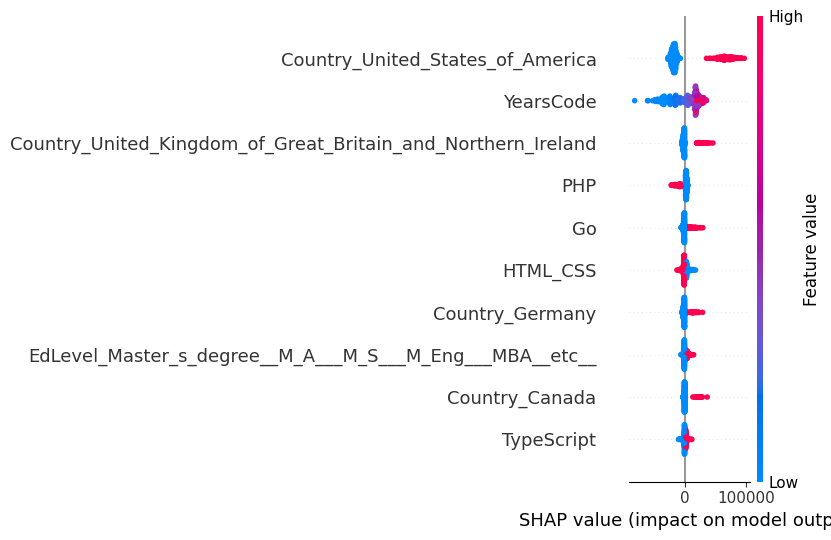

In [ ]:
# SHAP analysis
explainer_rf = shap.TreeExplainer(rf)

# Sample data to speed up SHAP computation
#shap_values_rf = explainer_rf.shap_values(X_test)

# Display summary plot
#shap.summary_plot(shap_values_rf, X_test)

#version 2
#Calculate SHAP values for the test data (reduce sample size to speed up computation)
#shap_values_rf = explainer_rf.shap_values(X_test.sample(1000, random_state=42))
#shap.summary_plot(shap_values_rf, X_test.sample(1000, random_state=42))

#version 3 Display summary plot for top 10 important features
X_sample = X_test.sample(500, random_state=42)
shap_values_rf = explainer_rf.shap_values(X_sample)
shap.summary_plot(shap_values_rf, X_sample, max_display=10)

How to Read a SHAP Plot

X-axis (SHAP value):
Represents how each feature influences the predicted salary.

Positive values → push the prediction up (increase salary)

Negative values → push the prediction down (decrease salary)

Y-axis (Features):
Features are listed in order of importance (from top to bottom).

Color (Feature value):
Indicates the actual value of the feature.

Red = High feature value

Blue = Low feature value

In [ ]:
# Calculate Feature Importance

import pandas as pd

feat_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\n--- Top 15 Important Features (Random Forest) ---")
display(feat_importance.head(15))



--- Top 15 Important Features (Random Forest) ---


,Feature,Importance
190,Country_United_States_of_America,0.355920
0,YearsCode,0.217602
176,Country_Switzerland,0.024707
16,Go,0.017634
188,Country_United_Kingdom_of_Great_Britain_and_No...,0.016343
18,HTML_CSS,0.015961
213,AISelect_Yes__I_use_AI_tools_daily,0.014618
28,PHP,0.014573
210,Employment_Student,0.013865
207,Employment_Independent_contractor__freelancer_...,0.013269


4. Build a Salary Prediction Model with LightGBM

In [ ]:
# Install dependencies (only once)
!pip install lightgbm shap -q
!pip install lightgbm -q



In [ ]:
import lightgbm as lgb
import shap
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010752 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 308
[LightGBM] [Info] Number of data points in the train set: 17636, number of used features: 124
[LightGBM] [Info] Start training from score 95267.523985
LightGBM model trained successfully!
LightGBM R²: 0.482
MAE: 32,670 USD
RMSE: 49,827 USD


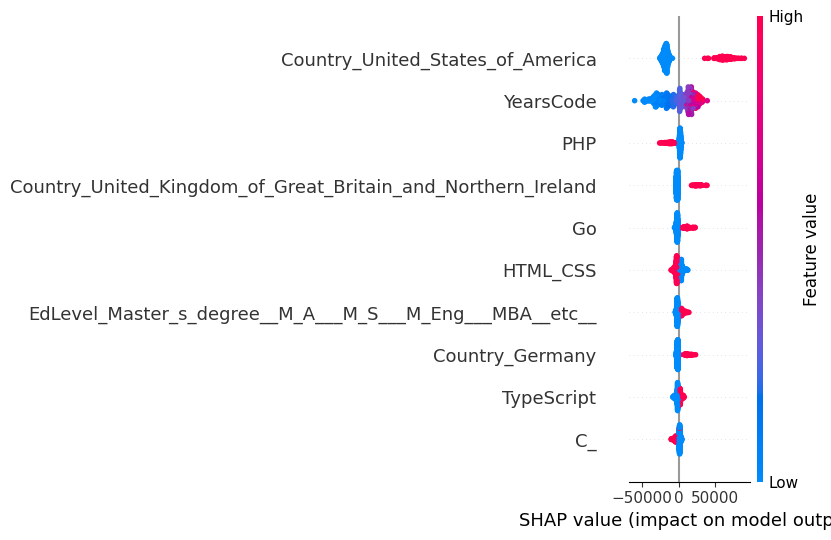

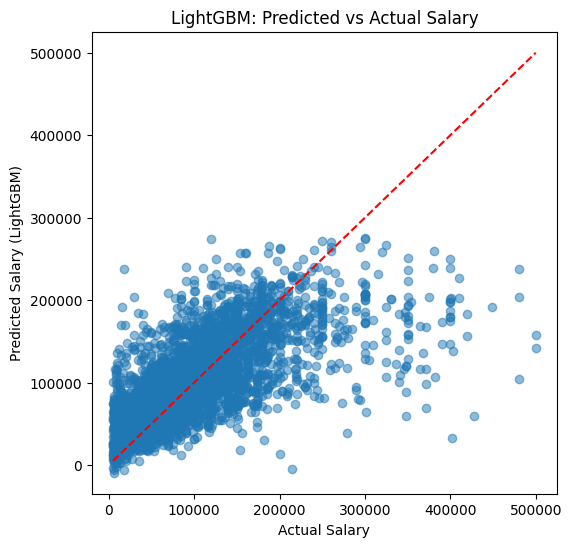

In [ ]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
import shap
import matplotlib.pyplot as plt

# Build LightGBM Model

lgbm = lgb.LGBMRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Train the model
lgbm.fit(X_train, y_train)
print("LightGBM model trained successfully!")

# Model Evaluation
y_pred_lgb = lgbm.predict(X_test)
r2_lgb = r2_score(y_test, y_pred_lgb)
mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
rmse_lgb = np.sqrt(mean_squared_error(y_test, y_pred_lgb))

print(f"LightGBM R²: {r2_lgb:.3f}")
print(f"MAE: {mae_lgb:,.0f} USD")
print(f"RMSE: {rmse_lgb:,.0f} USD")

# Shap Analysis

# Sample 500 records from test data to reduce computation
X_sample_lgb = X_test.sample(500, random_state=42)

explainer_lgb = shap.TreeExplainer(lgbm)
shap_values_lgb = explainer_lgb.shap_values(X_sample_lgb)

# Display top 10 important features
shap.summary_plot(shap_values_lgb, X_sample_lgb, max_display=10)

# Scatter Plot: Predicted vs Actual Salary
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_lgb, alpha=0.5)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    'r--'
)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary (LightGBM)")
plt.title("LightGBM: Predicted vs Actual Salary")
plt.show()


Red = High feature value, Blue = Low feature value
Positive SHAP value → pushes the salary prediction up
Negative SHAP value → pushes the salary prediction down


5. Review Results

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


#
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "LightGBM"],
    "R2": [r2_lr, r2_rf, r2_lgb],
    "MAE": [mae_lr, mae_rf, mae_lgb],
    "RMSE": [rmse_lr, rmse_rf, rmse_lgb]
})
print(results)

               Model        R2           MAE          RMSE
0  Linear Regression  0.449952  34177.266444  51341.402381
1      Random Forest  0.457286  34063.818348  50997.967403
2           LightGBM  0.481915  32670.456382  49827.328370


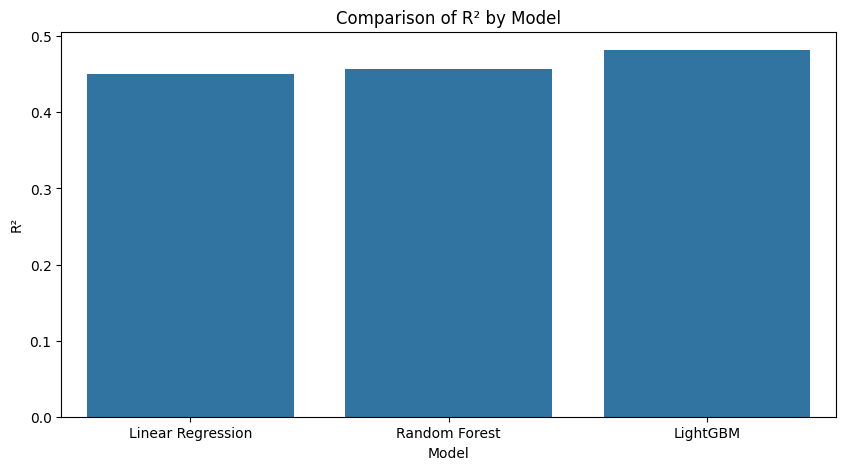

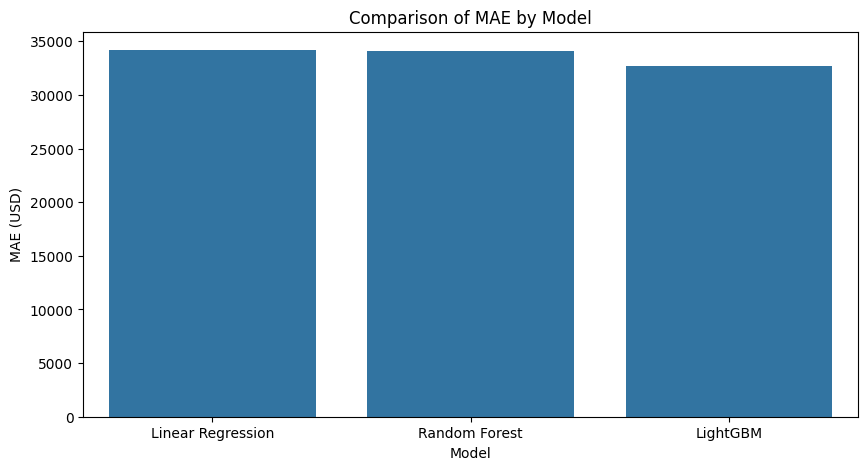

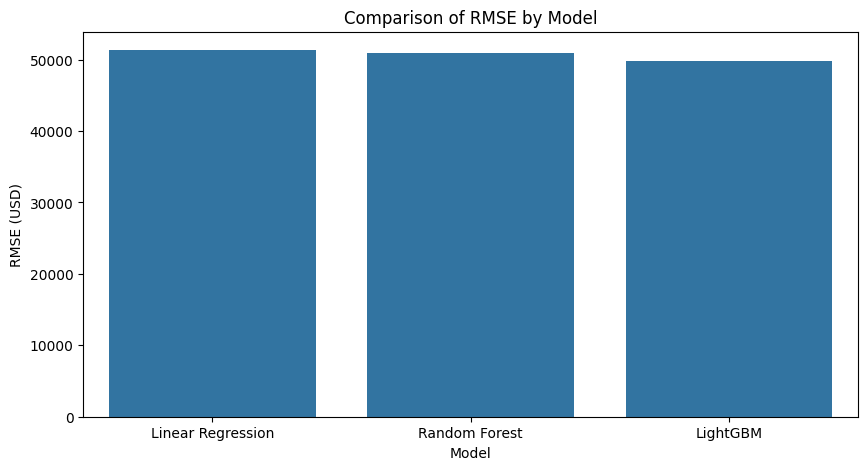

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.barplot(x="Model", y="R2", data=results)
plt.title("Comparison of R² by Model")
plt.ylabel("R²")
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(x="Model", y="MAE", data=results)
plt.title("Comparison of MAE by Model")
plt.ylabel("MAE (USD)")
plt.show()


plt.figure(figsize=(10,5))
sns.barplot(x="Model", y="RMSE", data=results)
plt.title("Comparison of RMSE by Model")
plt.ylabel("RMSE (USD)")
plt.show()


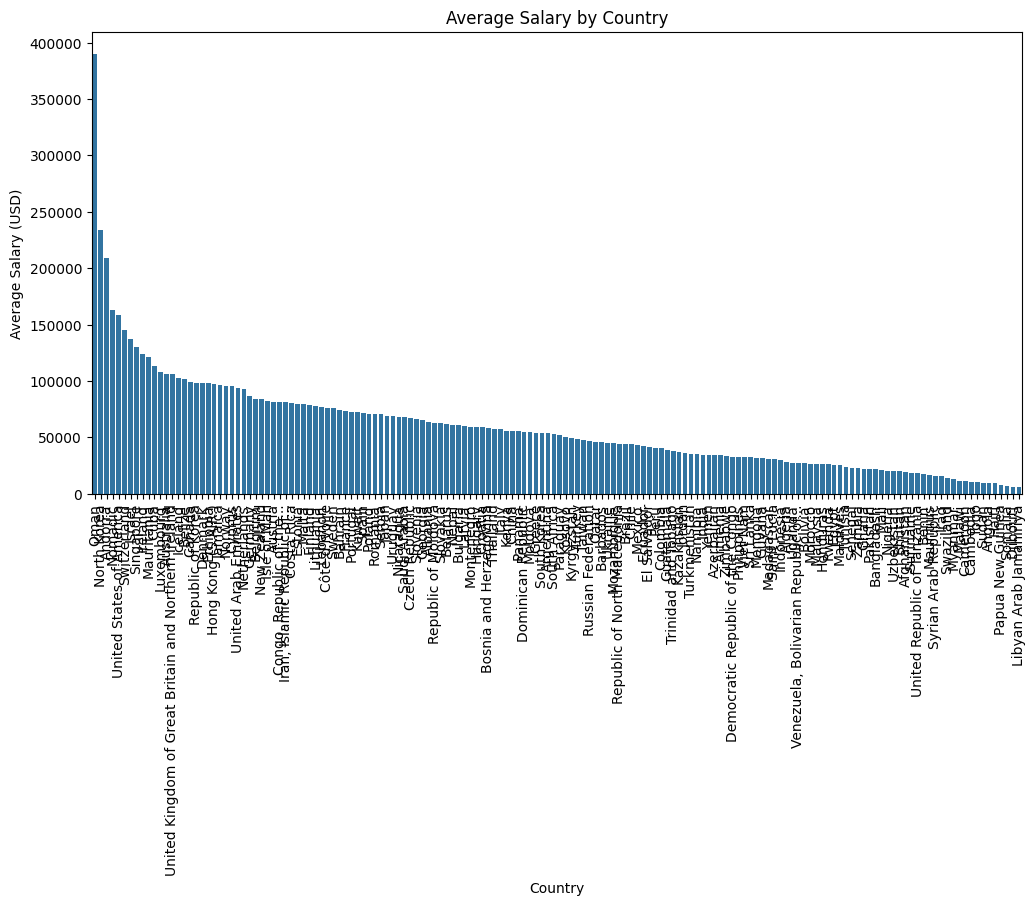

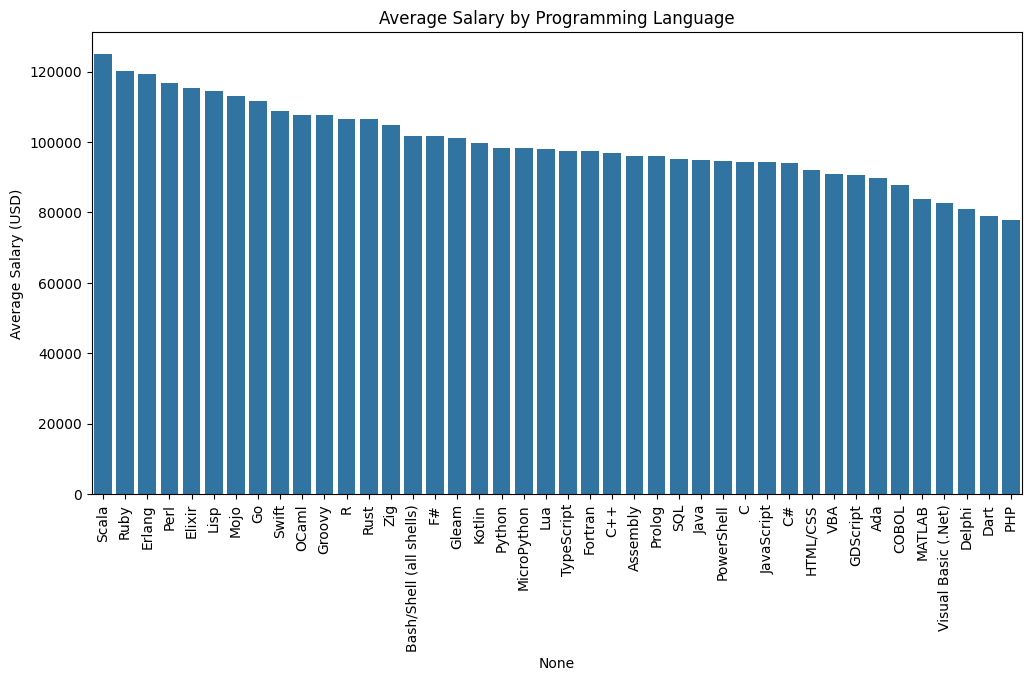

In [ ]:
import re

# Average Salary by Country
country_salary = df.groupby("Country")["ConvertedCompYearly"].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=country_salary.index, y=country_salary.values)
plt.xticks(rotation=90)
plt.ylabel("Average Salary (USD)")
plt.title("Average Salary by Country")
plt.show()

# Average Salary by Programming Language
# Create a list of all languages mentioned in the survey
all_languages = df['LanguageHaveWorkedWith'].str.split(';', expand=True).stack()
unique_languages = all_languages.unique()

# Calculate average salary for each language
language_salary = {}
for lang in unique_languages:
    if pd.notnull(lang) and lang != '': # Handle potential empty strings or NaN
        # Escape special characters in language names for accurate matching
        escaped_lang = re.escape(lang)
        # Find indices where the language is present in the original column
        indices = df['LanguageHaveWorkedWith'].str.contains(escaped_lang, na=False)
        # Calculate the mean salary for these entries
        language_salary[lang] = df.loc[indices, "ConvertedCompYearly"].mean()

language_salary = pd.Series(language_salary).sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=language_salary.index, y=language_salary.values)
plt.xticks(rotation=90)
plt.ylabel("Average Salary (USD)")
plt.title("Average Salary by Programming Language")
plt.show()

5. Example case

In [ ]:


# === my Profile ===
my_profile = {
    "Age": 46,
    "EdLevel": "PhD",
    "YearsCode": 1,
    "Employment": "Freelance",
    "LanguageHaveWorkedWith": "Python",
    "AISelect": "Yes"
}

# === Countries where we compared ===
countries = ["Germany", "Japan", "Canada", "Italy", "United States"]

# DataFrame for countries
input_data = pd.DataFrame([
    {**my_profile, "Country": country} for country in countries
])

# === We apply for the same preparation ===
# （in case we use pd.get_dummies when we train the data）
input_encoded = pd.get_dummies(input_data)
input_encoded = input_encoded.reindex(columns=X_train.columns, fill_value=0)

# === predict Salary in three models ===
pred_lr = lr.predict(input_encoded)
pred_rf = rf.predict(input_encoded)
pred_lgb = lgbm.predict(input_encoded)

# === Show the 3 results ===
results = pd.DataFrame({
    "Country": countries,
    "Linear Regression (USD)": pred_lr,
    "Random Forest (USD)": pred_rf,
    "LightGBM (USD)": pred_lgb
})

print("\n=== Predicted Annual Salary by Country ===\n")
print(results)



=== Predicted Annual Salary by Country ===

         Country  Linear Regression (USD)  Random Forest (USD)  LightGBM (USD)
0        Germany             60014.599688         52329.979407    57012.172248
1          Japan             33138.376116         32639.924996    35417.110413
2         Canada             69430.511083         69586.120086    58103.970429
3          Italy             30859.813157         32204.755978    26701.648185
4  United States             11997.282906         32241.403399    34952.521839


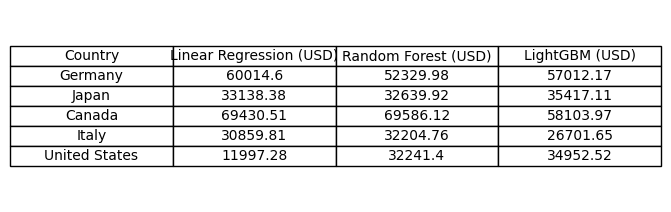

In [ ]:
== Round to 2 decimal places (cents) ===
results = pd.DataFrame({
    "Country": countries,
    "Linear Regression (USD)": [round(v, 2) for v in pred_lr],
    "Random Forest (USD)": [round(v, 2) for v in pred_rf],
    "LightGBM (USD)": [round(v, 2) for v in pred_lgb]
})

# === Create table ===
fig, ax = plt.subplots(figsize=(7, 2.5))
ax.axis("tight")
ax.axis("off")

# Draw table
table = ax.table(cellText=results.values,
                 colLabels=results.columns,
                 cellLoc="center",
                 loc="center")

# Style settings
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

# === Save as PNG file ===
output_path = "predicted_salary_table_cents.png"  # Save in the current directory
plt.savefig(output_path, bbox_inches="tight", dpi=300)
plt.show()
